In [2]:
from google.cloud import bigquery


In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Predecir cuántas veces será compartido un artículo de Machine Learning.

Haremos una primer predicción de regresión lineal simple -con una sola variable predictora-  para poder graficar en 2 dimensiones (ejes X e Y) y luego un ejemplo de regresión Lineal Múltiple, en la que utilizaremos 3  dimensiones (X,Y,Z) y predicciones.

In [29]:
#cargamos los datos de entrada
data = pd.read_csv("./articulos_ml.csv")
#veamos cuantas dimensiones y registros contiene
data.shape

(161, 8)

In [28]:
#Nos devuelve (161,8)
#Veamos esas primeras filas:
#son 161 registros con 8 columnas. Veamos los primeros registros
data.head()

,Word count,# of Links,# of comments,# Images video,# Shares
0,1888,1,2.0,2,200000
1,1742,9,NaN,9,25000
2,962,6,0.0,1,42000
3,1221,3,NaN,2,200000
4,2039,1,104.0,4,200000


Title: Titulo del Artículo

url: ruta al artículo

Word count: la cantidad de palabras del artículo,

#of Links: los enlaces externos que contiene,

#of comments: cantidad de comentarios,

#Images video: suma de imágenes (o videos),

Elapsed days: la cantidad de días transcurridos (al momento de crear el archivo)

#Shares: nuestra columna de salida que será la “cantidad de veces que se compartió el artículo”.

Se ven algunos campos con valores NaN (nulos) por ejemplo algunas urls o en comentarios.

In [26]:
#Veamos algunas estadísticas básicas de nuestros datos de entrada:
data.describe()

,Word count,# of Links,# of comments,# Images video,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,43408.006839
min,250.000000,0.000000,0.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,350000.000000


Aqui vemos que la media de palabras en los artículos es de 1808. El artículo más corto tiene 250 palabras
y el más extenso 8401. Intentaremos ver con nuestra relación lineal, si hay una correlación entre la cantidad
de palabras del texto y la cantidad de Shares obtenidos.

C:\Users\Mauro.Prystupa\AppData\Local\Temp\ipykernel_13772\3496384728.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(['Title','url', 'Elapsed days'],1).hist()


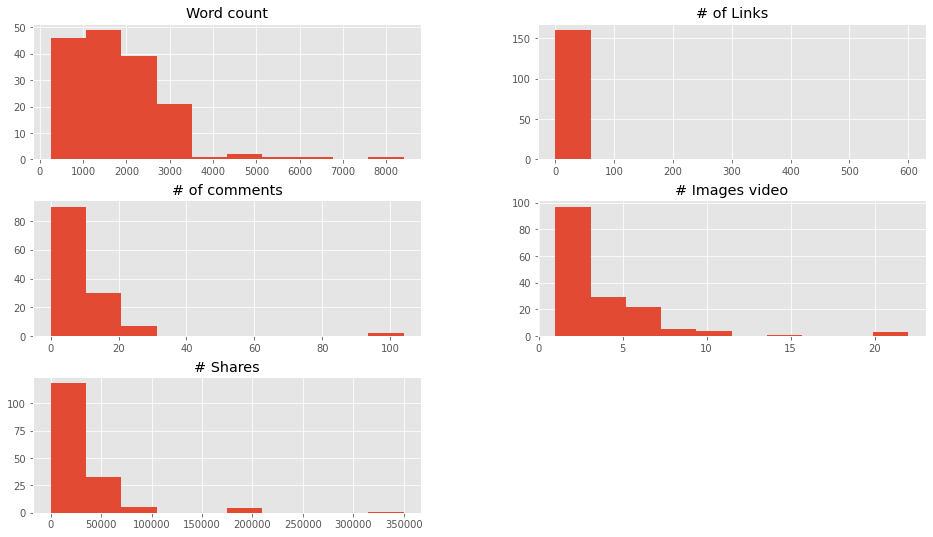

In [30]:
# Visualizamos rápidamente las caraterísticas de entrada
data.drop(['Title','url', 'Elapsed days'],1).hist()
plt.show()

Vamos a filtrar los datos de cantidad de palabras para quedarnos con los registros con menos de 3500 palabras y también con los que tengan Cantidad de compartidos menos a 80.000. Lo gratificaremos pintando en azul los puntos con menos de 1808 palabras (la media) y en naranja los que tengan más.

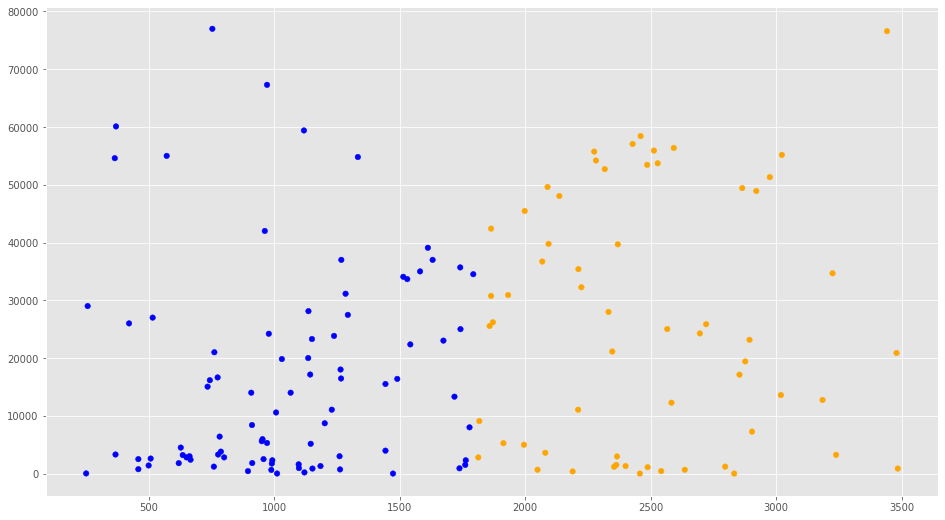

In [18]:
# vamos a RECORTAR los datos en la zona donde se concentran mas los puntos 
# esto es en el eje X: entre 0 y 3500
# y en el eje Y: entre 0 y 80000

filter_data = data[(data['Word count'] <= 3500) & (data['# Shares']<80000)]
# aca nos quedamos solo con los elementos que cumplen las dos condiciones
colores = ['orange','blue']
# declaramos un array de elementos, en el cual la posicion 0 es orange y la posicion 1 es blue
tamanios = [ 30,60]
# declaro un array de elementos, en el cual la posicion 0 es 30 y la posicion 1 es 60, esto me sirva para hacer mas grande las pelotitas de colores 
f1 = filter_data['Word count'].values # estos valores los guardamos es una variable para despues usarlo como uno de los ejes, es este caso el x
f2 = filter_data['# Shares'].values # estos valores los guardamos es una variable para despues usarlo como uno de los ejes, es este caso el y

#vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras

asignar=[] # Declaramos un array vacio que se va a ir completando con los elementos segun la condicion que le apliquemos abajo. 
for index, row in filter_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0]) #todos los que esten por debajo de 1808 palabras van a ser de color orange, colores que asignamos en el array un poco mas arriba
    else:
        asignar.append(colores[1]) #todos los que esten por debajo de 1808 palabras van a ser de color blue, colores que asignamos en el array un poco mas arriba
        
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
# El metodo scatter tiene muchos parametros, vamos a usar 4.
# f1 = x ->este parametro es obligatorio
# f2 = y ->este parametro es obligatorio
# c = color ->este parametro es opcional
# s = al tamanio de los circulos ->este parametro es opcional

plt.show() # muestra el grafico


# Regresión Lineal con Python y SKLearn

### Vamos a crear nuestros datos de entrada por el momento sólo Word Count y como etiquetas los # Shares. Creamos el objeto LinearRegression y lo hacemos “encajar” (entrenar) con el método fit(). Finalmente imprimimos los coeficientes y puntajes obtenidos.

In [12]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y

dataX = filter_data[['Word count']] 
#armamos la variable que va a condicionar a la otra, en este caso vamos a predecir dependiendo de la cantidad de palabras que tenga nuestro articulo la cantidad de compartidas que tendra el mismo.
x_train = np.array(dataX)
#armamos un array con los valores que obtengamos de la variable anteriormente creada.
y_train = filter_data['# Shares'].values
# armamos la variable que va a ser condicionada por la variable que creamos al principio.
# Creamos le objeto de Regresion Linear
regr = linear_model.LinearRegression()
#creamos la variable que va a ser nuestra variable de regresion lineal

# Entrenamos nuestro modelo
y_pred = regr.fit(x_train, y_train)

# Hacemos las predicciones (en este caso al ser 2D) va a ser una linea
y_pred = regr.predict(x_train)

# Veamos los coeficientes obtenidos, En nuestro caso, serán la Tangente
print('Coeficientes:', regr.coef_)

# Este es el valor donde corta el eje Y (en X=0)
print('Termino Independiente:', regr.intercept_)

# Error Cuadrado Medio
print("Error cuadrado medio: %.2f" % mean_squared_error(y_train, y_pred))

# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Varianza: %.2f' % r2_score(y_train, y_pred))

Coeficientes: [5.69765366]
Termino Independiente: 11200.30322307416
Error cuadrado medio: 372888728.34
Varianza: 0.06


De la ecuación de la recta y = mX + b nuestra pendiente “m” es el coeficiente 5,69 y el término independiente “b” es 11200. Tenemos un Error Cuadrático medio enorme… por lo que en realidad este modelo no será muy bueno 😉. Pero estamos aprendiendo a usarlo, que es lo que nos importa ahora 🙂. Esto también se ve reflejado en el puntaje de Varianza que debería ser cercano a 1.0.

# Predicción en regresión lineal simple

In [31]:
#Vamos a comprobar:
# Quiero predecir cuántos "Shares" voy a obtener por un artículo con 2.000 palabras,
# según nuestro modelo, hacemos:
y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil))

22595
